### **Exercise 2.01: Loading and preparing the data for analysis**

In [0]:
# Import necessary modules

%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [3]:
# Upload files into the google colab environment

from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [0]:
# Upload the csv file into a pandas dataframe

import io
rawBostonData = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))

In [5]:
# Inspect the dataframe

rawBostonData.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
# Drop missing values from the dataframe

rawBostonData = rawBostonData.dropna()

In [0]:
# Drop duplicate records from the dataframe

rawBostonData = rawBostonData.drop_duplicates()

In [8]:
# List the dataframe column names

list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [0]:
# Rename the dataframe column headings

renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})

In [10]:
# Inspect the types of data in the dataframe

renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
crimeRatePerCapita        506 non-null float64
landOver25K_sqft          506 non-null float64
non-retailLandProptn      506 non-null float64
riverDummy                506 non-null int64
nitrixOxide_pp10m         506 non-null float64
AvgNo.RoomsPerDwelling    506 non-null float64
ProptnOwnerOccupied       506 non-null float64
weightedDist              506 non-null float64
radialHighwaysAccess      506 non-null int64
propTaxRate_per10K        506 non-null int64
pupilTeacherRatio         506 non-null float64
pctLowerStatus            506 non-null float64
medianValue_Ks            506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [11]:
# Calculate basic statistics using the values in the dataframe

renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [0]:
# Split the data set into training and test sets

X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10 
test_data_size = 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

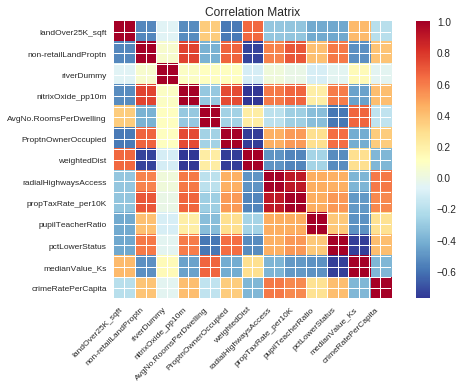

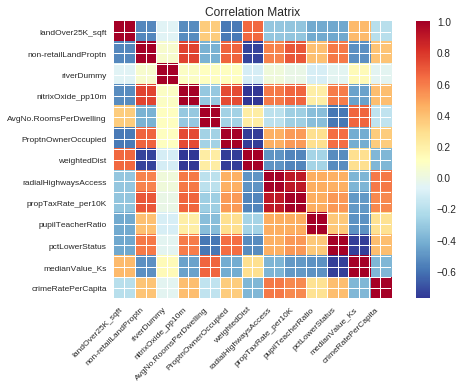

In [13]:
# Create and plot a correlation matrix

corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

### **Exercise 2.02: Graphical investigation of linear relationships using Python**





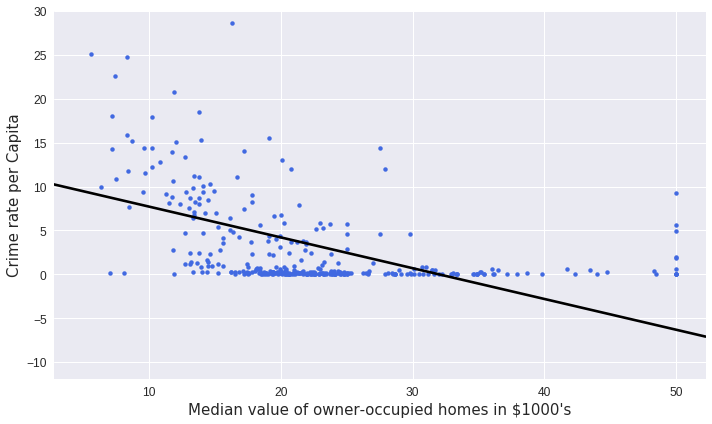

In [14]:
# Use the seaborn function regplot to create a scatter plot and fit a regression line through it

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=None,
data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color":\
"royalblue", "alpha":1})
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's",\
fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

### **Exercise 2.03: Examining a possible log-linear relationship using Python**

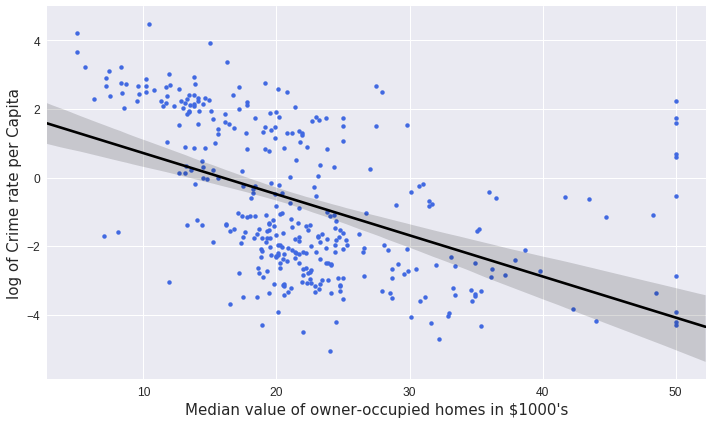

In [15]:
# Use the seaborn function regplot to create a log-linear plot and fit a regression line through it

fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax,\
color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15,\
fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's",\
fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

### **Exercise 2.04: Fit a simple linear regression model using the Statsmodels formula API**

In [16]:
# Use the statsmodels API to create a simple linear regression

linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks',\
data=train_data)
linearModelResult = linearModel.fit()
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.56e-13
Time:                        01:03:01   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

### **Activity 2.01: Fit a log-linear model using the Statsmodels formula API**

In [17]:
# Use the statsmodels API to create a log-linear regression model

logLinearModel = smf.ols(formula='np.log(crimeRatePerCapita) ~ medianValue_Ks',\
data=train_data)
logLinearModResult = logLinearModel.fit()
print(logLinearModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.238
Model:                                    OLS   Adj. R-squared:                  0.236
Method:                         Least Squares   F-statistic:                     109.9
Date:                        Wed, 04 Dec 2019   Prob (F-statistic):           1.48e-22
Time:                                01:03:07   Log-Likelihood:                -727.67
No. Observations:                         354   AIC:                             1459.
Df Residuals:                             352   BIC:                             1467.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

### **Exercise 2.05: Fit a multiple linear regression model using the Statsmodels formula API**

In [18]:
# Use the statsmodels API to create a multiple linear regression model

multiLinearModel = smf.ols(formula=\
'crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess +\
medianValue_Ks + nitrixOxide_pp10m', data=train_data)
multiLinearModResult = multiLinearModel.fit()
print(multiLinearModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.19e-37
Time:                        01:03:14   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 

### **Activity 2.02: Fit a multiple log-linear regression model**

In [19]:
# Use the statsmodels API to create a multiple log-linear regression model

multiLogLinMod = smf.ols(formula=\
'np.log(crimeRatePerCapita) ~ \
(pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m)**2',\
data=train_data)
multiLogLinModResult = multiLogLinMod.fit()
print(multiLogLinModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.884
Model:                                    OLS   Adj. R-squared:                  0.881
Method:                         Least Squares   F-statistic:                     261.5
Date:                        Wed, 04 Dec 2019   Prob (F-statistic):          7.79e-154
Time:                                01:03:22   Log-Likelihood:                -394.39
No. Observations:                         354   AIC:                             810.8
Df Residuals:                             343   BIC:                             853.3
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------